# Project Name: Credit Card Fraud Detection
In this project we are going to predict whether a credit card transaction is fradulent or not. Here we are given with information on credit card transactions such as time lapse,  amount, and 28 special features (not described) and labels regarding which transactions as fraud and which are not(1 for fraud transaction and 0 for legit transaction). Our objective is to build a model that can predict whether a  particular credit card transaction is fradulent or not. 

Dataset Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

### Calling the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# let's see the number of rows and columns
print(f'''
No. of rows: {df.shape[0]}
No. of columns: {df.shape[1]}''')


No. of rows: 284807
No. of columns: 31


In [6]:
# missing values
df.isnull().sum()

# no null values in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# distribution of the legit and fradulent transaction
df['Class'].value_counts()

# the dataset is highly imbalanced

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# seperating the legit and the fradulent transaction records

legit = df[df['Class']==0]
fraud = df[df['Class']==1]

print(f'''
Shape of legit: {legit.shape}
Shape of fraud: {fraud.shape}''')


Shape of legit: (284315, 31)
Shape of fraud: (492, 31)


In [11]:
# means according to transaction type
df.groupby('Class').mean()

# for each features there is a lot of difference in mean

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under Sampling
We have already seen that the dataset is highly imbalanced. That is, the number of records on fradulent transactions are pretty low as conpared to the number of records on the legit transaction. So, using the dataset in this imbalanced form might be misleading for conclusion. Which is why we are going to use the undersampling techniques and use an new dataset that contains equal no of records on legit and fradulent transactions. 

In [12]:
# drawing sample of legit transactions equal to the number of fradulent transactions
legit_sample = legit.sample(n=fraud.shape[0])
print(f'legit_sample shape: {legit_sample.shape}')

legit_sample shape: (492, 31)


In [13]:
# merging the fradulent and Legit_sample datset
ndf = pd.concat([legit_sample, fraud], axis=0)
print(f'Shape of new data: {ndf.shape}')

Shape of new data: (984, 31)


In [14]:
# distribution of the type of transactions in the new dataset
ndf['Class'].value_counts()
# now it becomes a balanced dataset

0    492
1    492
Name: Class, dtype: int64

### X and y formation

In [15]:
X = ndf.drop('Class', axis=1)
y = ndf['Class']

print(f'''
Shape of X: {X.shape}
Shape of y: {y.shape}''')


Shape of X: (984, 30)
Shape of y: (984,)


### Train-Test-Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(f'''
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape}''')


X_train shape: (787, 30)
X_test shape: (197, 30)
y_train shape: (787,)
y_test shape: (197,)


### Model Training

In [17]:
# we are going to use Logistic Regression model to predict whether a transaction is fraud or not
from sklearn.linear_model import LogisticRegression

# model defining
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

In [18]:
# let's first calculate the value of y for X_test
y_pred = model.predict(X_test)

Text(54.75, 0.5, 'Predicted')

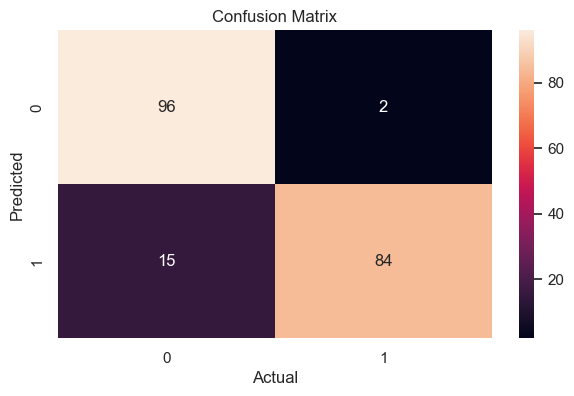

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# building confusion matrix
cm = confusion_matrix(y_test, y_pred)

# representing the confusion matrix
sns.set(rc={'figure.figsize':(7,4)})
sns.heatmap(cm, annot=True, fmt='g', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# very high number of correct prediction

In [23]:
# classification report 
from sklearn.metrics import classification_report

cf = classification_report(y_test, y_pred)
print(cf)

# very high level of precision and recall score

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        98
           1       0.98      0.85      0.91        99

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

